# Project: Explore Medical Appointment No Shows Dataset and Fact Finding 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

In this project,I explored a dataset related to patients' medical appointment show up history in Brazil. The dataset [here](www.kaggle.com/joniarroba/noshowappointments) sourced from [Kaggle](https://kaggle.com/)
includes data about patient's physical condition, personal information, location and scheduled medical appointments' details. The main goal of this project is to identify the reasons behind not showing up after making an appointment. There are total 13 independent and 1 dependent variables in the dataset. Those are tabulated below for the ease of my analysis. I was interested to figure out what variables really dictate the cause of not turning up and among the independent variables I picked up the patient's age, gender, physical conditions such as hypertension, diabetes,alcoholism, whether or not the patient is handicap as well as effect of medical benefit(scholarship) and sms reminder before appoinment date.One important point to be noted here is that this analysis will be based on descriptive statistics and no final prediction will be done.


|  No |  Features | Description  |
|---|---|---| 
|  1 |  PatientID | Patient's identification  |
|2|  AppointmentID | Identification number assigned after making an appointment  |
|  3 | Gender  | Patient's gender
|  4 |  ScheduleDay | The day someone resgistered to set up an appointment  
|  5 |  AppointmentDay | The actual day of visit  |
|   6|  Age |Age of the patient  |
|  7 | Neighbourhood  | Location of the hospital  |
|   8|  Scholarship | Whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
|   9|  Hipertension | Does patient have hypertension, true or false  |
|   10|  Diabetes | Does patient have diabetes, true or false |
|   11| Alcoholism  | Does patient have alcohol addiction, true or false  |
|  12 |  Handcap | Does patient have any disability |
|  13 |  SMS_received | 1 or zero text reminder   |
|   14|  No-show |'No' the patient showed up;'Yes' for a no-show


The questions I focused on to answer through my data analysis process are stated below. The type of my questions could be categorized in three main factors. Health condition, personal information and medical benefit such as recipient of scholarship from Brasilian welfare program. 

### Questions
 - What is the gender profile of all the patients?
 - What is the distribution of gender in No-show up category?
 - What is the age distribution among all patients?
 - Does any age category have higher 'No -show' tendency over others?
 - How does a dibetes patient respond to an appointmnt?
 - How does a hypertension patient respond to an appointment?
 - How does a patient with alcohol addiction respond to an appointment?
 - Does gender play any role in any of these health condition?
 - Which hospital location gets less 'No-show' response?
 - Does text reminder help in getting less 'No-show' response?
 - Does scholarship play any part in showing up on scheduled appointment day?
 - How being handicap does impact on not-showing up on appoinement day?

Before exploring the dataset, I accumulated all the neccessary packages and also included the % matplotlib inline command line so that my visualization are plotted inline with the notebook. 


In [817]:
# import statements for all of the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html



## Data Wrangling

In this section of the report, I loaded in the data, assesed for cleanliness, and then trimmed and cleaned the dataset for desired analysis. 

### Load Data and Review

In [818]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the above five rows, I see there are few spelling mistakes such as Hipertension, Handcap(should be hypetension and handicap respectively) as well as some inconsistency in first two columns' featurename. PatientId and AppointmentID need to be consistent in case of ID portion. So I renamed the columns to maintain constancy.

In [819]:
#renaming the errant columns
df.rename(columns={'PatientId': 'PatientID', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

In [820]:
#check the structure dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Obsevations
 - The columns' name have been corrected.
 - There are 110527 rows and 14 columns in the dataset.
 - There is no null value in any rows. So next, we can check if there is any duplicate rows.
 - The appointment times are all at 00:00:00, which certainly imply that they were performed at midnight or the moment of booking was not important in documentaion. But to make data more meaningful,'ScheduleDay' and 'AppointmentDay' should be in datetime object.

In [821]:
#check duplicate values

df.duplicated().any()

False

There is no duplicated rows as well. Time to bring the datatype coherent so that we can compare and measure the effects of independent variables properly. Let's change the data type of 'AppointmentID', 'Scholarship','Diabetes','Hypertension','Handicap','Alcoholism','SMS_recieved' from int64 to object. Also, PatientID could be int64. Since there are no duplicate value, we can proceed to convert the data in this column to datetime objects.

### Conversion of data type

In [822]:
# convert all the categorical variables from 'int' to 'category' type

df['Gender'] = df['Gender'].astype('category')
df['Scholarship'] = df['Scholarship'].astype('category')
df['Hypertension'] = df['Hypertension'].astype('category')
df['Diabetes'] = df['Diabetes'].astype('category')
df['Alcoholism'] = df['Alcoholism'].astype('category')
df['Handicap'] = df['Handicap'].astype('category')
df['SMS_received'] = df['SMS_received'].astype('category')
df['AppointmentID'] = df['AppointmentID'].astype('category')


In [823]:
#convert PatientID data type from 'float' to 'int'

df['PatientID'] = df['PatientID'].astype('int64')

# check if teh conversion was successful
df.PatientID

0          29872499824296
1         558997776694438
2           4262962299951
3            867951213174
4           8841186448183
               ...       
110522      2572134369293
110523      3596266328735
110524     15576631729893
110525     92134931435557
110526    377511518121127
Name: PatientID, Length: 110527, dtype: int64

The data type conversion was succesful and we can finish conversiopn step after changing  'ScheduledDay' and 'AppointmentDay' columns' datatype from object to datetime.

In [824]:
# convert AppointmentDay and ScheduleDay data type from 'float' to 'int'
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null category
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null category
Hypertension      110527 non-null category
Diabetes          110527 non-null category
Alcoholism        110527 non-null category
Handicap          110527 non-null category
SMS_received      110527 non-null category
No-show           110527 non-null object
dtypes: category(8), datetime64[ns, UTC](2), int64(2), object(2)
memory usage: 12.1+ MB


In [825]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [826]:
# Check any abnormal data is present

df.describe()

,PatientID,Age
count,1.105270e+05,110527.000000
mean,1.474963e+14,37.088874
std,2.560949e+14,23.110205
min,3.921700e+04,-1.000000
25%,4.172614e+12,18.000000
50%,3.173184e+13,37.000000
75%,9.439172e+13,55.000000
max,9.999816e+14,115.000000


Looks like the minimum age is -1 which is possibly a mistake and we can ignore this data from our analytical part. Let's find out the row and trim it.

### Cleaning dataset

In [827]:
# filter the row with negetive age
df[df.Age == -1]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [828]:
# drop the row with negetive age
df.drop(index=99832, inplace=True)



In [829]:
#confirm the cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110526 non-null int64
AppointmentID     110526 non-null category
Gender            110526 non-null category
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null category
Hypertension      110526 non-null category
Diabetes          110526 non-null category
Alcoholism        110526 non-null category
Handicap          110526 non-null category
SMS_received      110526 non-null category
No-show           110526 non-null object
dtypes: category(8), datetime64[ns, UTC](2), int64(2), object(2)
memory usage: 12.9+ MB


In [830]:
#check the unique data in each column

df.nunique()

PatientID          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

### Observations
From unique data,couple of important findings are worth to mention before we proceed toward exploratory data analysis. 
- There are  62298 unique PatientID which tells us that single patient scheduled several times since AppoinmentID shows 110526 unique rows.
- Gender types are two(female and male)
- Number of AppointmentDay are less than ScheduleDay which makes sense implying that from end of april to begining of june, there might be around 5 weeks and 27 individual day are practical. But we can confirm looking at them separately in the next cell. 
- Unique Age count are 103 which may need more categorization.
- Neighbourhood count seems meaningful.
- Scholarship,Hypertension,Diabetes,Alcoholism, Handicap,SMS_recieved remain within two values confirming absence or presence of the specificcondition. 

Let's look at those variables in details to explore pattern and trend and extract the valuable insight in order to predict if a patient will show up for their scheduled appointment or not.

In [914]:
# print unique values of the variables of interest

print(df.Gender.unique())
print(df.AppointmentDay.unique())
print(df.Neighbourhood.unique())
print(df.Scholarship.unique())
print(df.Hypertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.SMS_received.unique())
print(df.Handicap.unique())
print(np.sort(df.Age.unique()))





[F, M]
Categories (2, object): [F, M]
<DatetimeArray>
['2016-04-29 00:00:00+00:00', '2016-05-03 00:00:00+00:00',
 '2016-05-10 00:00:00+00:00', '2016-05-17 00:00:00+00:00',
 '2016-05-24 00:00:00+00:00', '2016-05-31 00:00:00+00:00',
 '2016-05-02 00:00:00+00:00', '2016-05-30 00:00:00+00:00',
 '2016-05-16 00:00:00+00:00', '2016-05-04 00:00:00+00:00',
 '2016-05-19 00:00:00+00:00', '2016-05-12 00:00:00+00:00',
 '2016-05-06 00:00:00+00:00', '2016-05-20 00:00:00+00:00',
 '2016-05-05 00:00:00+00:00', '2016-05-13 00:00:00+00:00',
 '2016-05-09 00:00:00+00:00', '2016-05-25 00:00:00+00:00',
 '2016-05-11 00:00:00+00:00', '2016-05-18 00:00:00+00:00',
 '2016-05-14 00:00:00+00:00', '2016-06-02 00:00:00+00:00',
 '2016-06-03 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
 '2016-06-07 00:00:00+00:00', '2016-06-01 00:00:00+00:00',
 '2016-06-08 00:00:00+00:00']
Length: 27, dtype: datetime64[ns, UTC]
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOV

### Observations
- The unique value printed above reflects the categories of the variables and we can now start our excavation. 
- For health conditions such as Hypertension, Diabetes, Alcoholism ,value 1 means yes and 0 means no.
- Same interpretation goes for SMS_received and enrollment in Brazilian Scholarship program. 
- For Handicap situation, 0 means the patient has no disability where the other values refer some levels of disability.
- The age range is pretty broad( 1 to 115) and it would be easier to analyse the data if we categorize them. 




## Exploratory Data Analysis

Now that I've trimmed and cleaned  data, I'm ready to move on to exploration. I computed statistics and created visualizations with the goal of addressing the research questions that I posed in the Introduction section. To be systematic with my approach, I looked at one variable at a time, and then followed it up by looking at relationships between variables.

### Question 1: What is the age distribution among all the patients?

In [832]:
# Find age ditribution
df.Age.describe()


count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

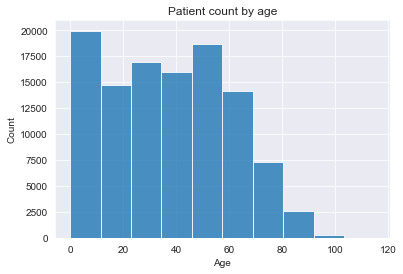

In [833]:
plt.hist(df.Age,bins= 10, alpha =0.8);
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Patient count by age');

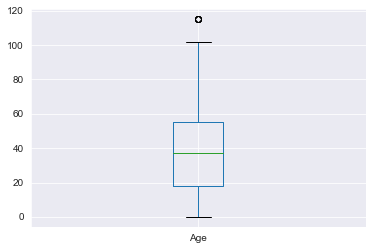

In [834]:
# box plot
df.Age.plot.box();

### Observations
- From the descriptive statistics of age and box plot, I find minimum age is 0 and maximum age is 115. 
- Also the distribution is skewed towards left side.
- Most of the patients are within 18-55 years old. 
If we plot the entire age data against No-show up count for comparison, it would be too crowded on the X axis. Let's group them by age range of 20 and check how is the percentage distributed among those age groups and answer our next question. 

### Question 2: Does any age category have higher 'No -show' tendency over others?

In this section, we will plot different age group with no-show/show status to get a pattern if there is any.

In [835]:
# set bin edges that will be used to "cut" the data into age groups
bin_edges = [0, 20, 40, 60, 80, 115]
# create labels for each age group
bin_names = ['<20', '20-39', '40-59', '60-79', '>=80']

# create the 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels=bin_names, right=False, include_lowest=True)

# check for successful creation of the column
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-79
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,40-59
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-79
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<20
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,40-59


In [836]:
# get counts for each age group and show up status
age_group_counts = df.groupby(['No-show','AgeGroup']).count().Age
age_group_counts


No-show  AgeGroup
No       <20         23670
         20-39       22190
         40-59       24416
         60-79       15118
         >=80         2811
Yes      <20          6741
         20-39        6680
         40-59        5656
         60-79        2692
         >=80          547
Name: Age, dtype: int64

In [837]:
# get total counts for each show up status
show_up_totals = df.groupby('No-show').count().Age
show_up_totals

No-show
No     88207
Yes    22319
Name: Age, dtype: int64

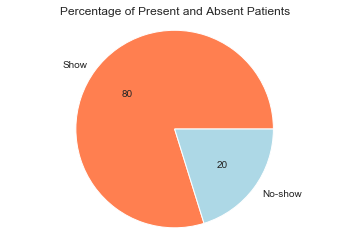

In [838]:
# percentage of not showing up patient

# plot pie chart
plt.pie(show_up_totals,labels=['Show','No-show'], colors=['coral','lightblue'],autopct='%.0f')
plt.axis('equal')
plt.title('Percentage of Present and Absent Patients');


### Observations
- 80% of total patients showed up on appointment day.

In [839]:
#get proportions by dividing each age group counts by total # of No-show(Yes) status counts
no_show_proportions = age_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions


AgeGroup
<20      0.302030
20-39    0.299297
40-59    0.253416
60-79    0.120615
>=80     0.024508
Name: Age, dtype: float64

In [840]:
# get proportion by dividing each age group counts by total # of No-show(No] status counts
show_proportions = age_group_counts['No']/show_up_totals['No']
show_proportions

AgeGroup
<20      0.268346
20-39    0.251567
40-59    0.276803
60-79    0.171392
>=80     0.031868
Name: Age, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each age group and width of each bar.

In [841]:
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

Now let's create the plot.

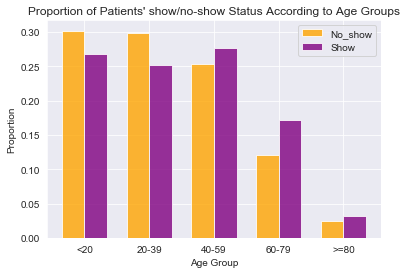

In [842]:
# plot bars
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No_show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')

# title and labels
plt.xlabel('Age Group')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['<20', '20-39', '40-59', '60-79', '>=80']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Age Groups")
plt.xticks(locations,labels);

# legend
plt.legend();


### Observations
- The above plot confirms the findings from descriptive plot of age distribution. 
- Number of patients who did not show up are mostly within first two age groups i.e from age of  0 to 39 .  Patients above age of 40 are more likely to show up at appoinment day.

### Question 3: What is the gender profile of all the patients?

To answer the above question regarding gender profile we can plot the total counts of patients grouped by gender. Let's plot a pie chart.

In [844]:
# get the patient counts grouped by gender

patient_count_by_gender = df.groupby('Gender').count().Age
patient_count_by_gender


Gender
F    71839
M    38687
Name: Age, dtype: int64

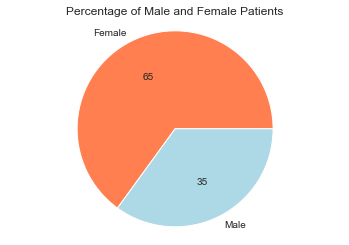

In [845]:
# plot pie chart
plt.pie(patient_count_by_gender,labels=['Female','Male'], colors=['coral','lightblue'],autopct='%.0f')
plt.axis('equal')
plt.title('Percentage of Male and Female Patients');

### Observations
- Number of female patients are higher than male patients. 65% to 35%

### Question 4:What is the distribution of gender in No-show up category?

I am now interested to look into the gender distribution and how it plays a role in case of not turning up at appointment day. Let's group the 'No-show' status by gender and then plot a bar chart with no-show and show proportion against female and male patients.

In [846]:
# get distribution of gender in no-show up category
gender_group_counts = df.groupby(['No-show','Gender']).count().PatientID
gender_group_counts

No-show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: PatientID, dtype: int64

In [847]:
#get proportions by dividing gender group counts by total # of No-show(Yes) status counts
no_show_proportions = gender_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

Gender
F    0.653882
M    0.346118
Name: PatientID, dtype: float64

In [848]:
#get proportions by dividing gender group counts by total # of No-show(No) status counts
show_proportions = gender_group_counts['No']/show_up_totals['No']
show_proportions

Gender
F    0.648985
M    0.351015
Name: PatientID, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each age group and width of each bar.

In [849]:
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

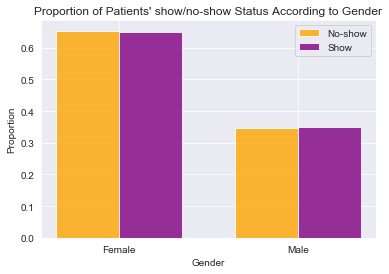

In [850]:
# plot bars
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')

# title and labels
plt.xlabel('Gender')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['Female', 'Male']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Gender")
plt.xticks(locations,labels)

# legend
plt.legend();

### Observations
- No significant difference in proportion is visible between female and male patients who did/did NOT show up. So there is no impact of gender in case of not visiting on appointment day even after scheduling for that.

### Question 5:How does a dibetes patient respond to an appointment?

It would be a similar approach to find the pattern among diabetes patient regarding not showing up at appointment day. I will groupby by no-show status and then plot against health conditions such as diabetes, hypertension and alcoholism.

In [851]:
# get distribution of diabetic pateint in no-show up category
diabetes_group_counts = df.groupby(['No-show','Diabetes']).count().PatientID
diabetes_group_counts 

No-show  Diabetes
No       0           81694
         1            6513
Yes      0           20889
         1            1430
Name: PatientID, dtype: int64

In [852]:
#get proportions by dividing diabetes group counts by total # of No-show(Yes) status counts
no_show_proportions = diabetes_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

Diabetes
0    0.935929
1    0.064071
Name: PatientID, dtype: float64

In [853]:
#get proportions by dividing diabetes group counts by total # of No-show(No) status counts
show_proportions = diabetes_group_counts['No']/show_up_totals['No']
show_proportions

Diabetes
0    0.926162
1    0.073838
Name: PatientID, dtype: float64

In [854]:
#location of x axis varaiable
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

### Plot proportions on a bar chart

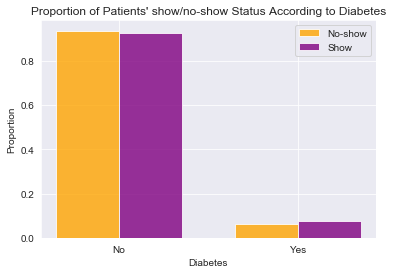

In [855]:
# plot bars 
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')
    
#labels and title
plt.xlabel('Diabetes')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['No','Yes']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Diabetes")
plt.xticks(locations,labels)
    
#legend
plt.legend();
    

In [856]:
# percentage of Diabetes patient

# get the patient counts grouped by dibetes

patient_count_by_diabetes = df.groupby('Diabetes').count().Age
patient_count_by_diabetes



Diabetes
0    102583
1      7943
Name: Age, dtype: int64

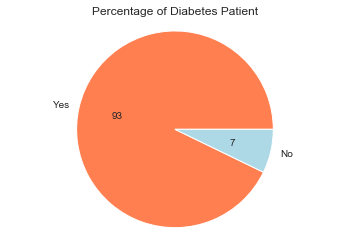

In [857]:
# plot pie chart
plt.pie(patient_count_by_diabetes,labels=['Yes','No'], colors=['coral','lightblue'],autopct='%.0f')
plt.axis('equal')
plt.title('Percentage of Diabetes Patient');

### Observations
- Only 7 % of all patients  have diabetes.
- Patient with diabetes have shown up less on the appointment day than patient who doesn't have it. On the other hand, most of the patients who do not have diabetes have higher record of attending the hospital on thier appointment day. Although the difference is small, but diabetic patient seems less caring in regard to hospital visit.

### Question 6:How does a hypertensive patient respond to an appointment?

In [858]:
# get distribution of hypertensive patient in no-show up category
hypertension_group_counts = df.groupby(['No-show','Hypertension']).count().PatientID
hypertension_group_counts 

No-show  Hypertension
No       0               70178
         1               18029
Yes      0               18547
         1                3772
Name: PatientID, dtype: int64

In [859]:
#get proportions by dividing hypertension group counts by total # of No-show(Yes) status counts
no_show_proportions = hypertension_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

Hypertension
0    0.830996
1    0.169004
Name: PatientID, dtype: float64

In [860]:
#get proportions by dividing hypertension group counts by total # of No-show(No) status counts
show_proportions = hypertension_group_counts['No']/show_up_totals['No']
show_proportions

Hypertension
0    0.795606
1    0.204394
Name: PatientID, dtype: float64

### Plot proportions on a bar chart

In [861]:
#location of x axis varaiable
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

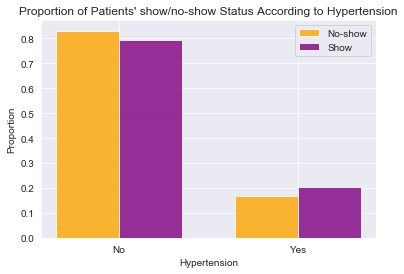

In [862]:
# plot bars 
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')
    
#labels and title
plt.xlabel('Hypertension')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['No','Yes']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Hypertension")
plt.xticks(locations,labels)
    
#legend
plt.legend();
    

In [863]:
# percentage of Hypertensive patient

# get the patient counts grouped by hypertension

patient_count_by_hypertension = df.groupby('Hypertension').count().PatientID
patient_count_by_hypertension



Hypertension
0    88725
1    21801
Name: PatientID, dtype: int64

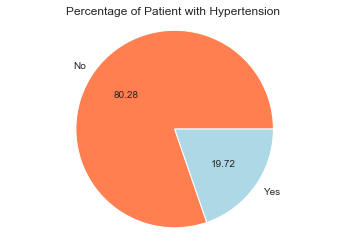

In [864]:
# plot pie chart
plt.pie(patient_count_by_hypertension,labels=['No','Yes'], colors=['coral','lightblue'],autopct='%.2f')
plt.axis('equal')
plt.title('Percentage of Patient with Hypertension ');

### Observations
- 80 % of total patient do not have Hypertension and they are less likely to show up on appointment day.
- Rest of the patients who have Hypertension did attend the visit.


### Question 7: How does a patient with alcohol addiction respond to an appointment?

In [865]:
# get distribution of alcoholism in no-show up category
alcohol_group_counts = df.groupby(['No-show','Alcoholism']).count().PatientID
alcohol_group_counts 

No-show  Alcoholism
No       0             85524
         1              2683
Yes      0             21642
         1               677
Name: PatientID, dtype: int64

In [866]:
#get proportions by dividing alcohol group counts by total # of No-show(Yes) status counts
no_show_proportions = alcohol_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

Alcoholism
0    0.969667
1    0.030333
Name: PatientID, dtype: float64

In [867]:
#get proportions by dividing alcohol group counts by total # of No-show(No) status counts
show_proportions = alcohol_group_counts['No']/show_up_totals['No']
show_proportions

Alcoholism
0    0.969583
1    0.030417
Name: PatientID, dtype: float64

### Plot proportions on a bar chart

In [868]:
#location of x axis varaiable
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

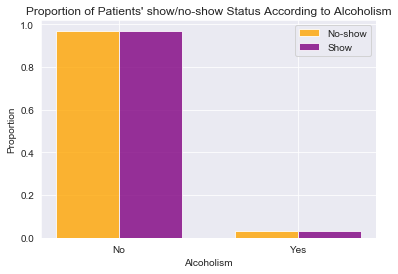

In [869]:
# plot bars 
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')
    
#labels and title
plt.xlabel('Alcoholism')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['No','Yes']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Alcoholism")
plt.xticks(locations,labels)
    
#legend
plt.legend();

In [870]:
# percentage of alcohol addiced patient

# get the patient counts grouped by alcoholism

patient_count_by_alcoholism = df.groupby('Alcoholism').count().PatientID
patient_count_by_alcoholism



Alcoholism
0    107166
1      3360
Name: PatientID, dtype: int64

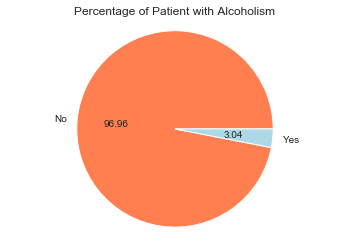

In [871]:
# plot pie chart
plt.pie(patient_count_by_alcoholism,labels=['No','Yes'], colors=['coral','lightblue'],autopct='%.2f')
plt.axis('equal')
plt.title('Percentage of Patient with Alcoholism');

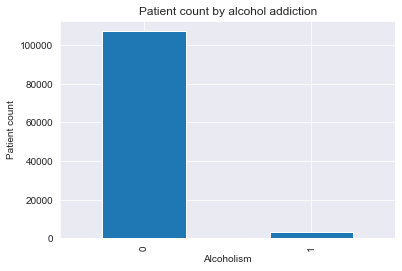

In [876]:
# count plot of no show category for patients with alcohol addiction
patient_count_by_alcoholism.plot(kind='bar')
plt.xlabel('Alcoholism')
plt.ylabel('Patient count')
plt.title('Patient count by alcohol addiction');



### Observations
- Only 3% patients have alcohol addiction problem.
- Among two groups the ratio of show and no-show trend is similar.

### Question 8: Does text reminder help in getting less 'No-show' response?

In [877]:
# get distribution of text reminder in no-show up category
sms_group_counts = df.groupby(['No-show','SMS_received']).count().PatientID
sms_group_counts 

No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: PatientID, dtype: int64

In [878]:
#get proportions by dividing sms group counts by total # of No-show(Yes) status counts
no_show_proportions = sms_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

SMS_received
0    0.561629
1    0.438371
Name: PatientID, dtype: float64

In [879]:
#get proportions by dividing sms group counts by total # of No-show(No) status counts
show_proportions = sms_group_counts['No']/show_up_totals['No']
show_proportions

SMS_received
0    0.708663
1    0.291337
Name: PatientID, dtype: float64

### Plot proportions on a bar chart

In [880]:
#location of x axis varaiable
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

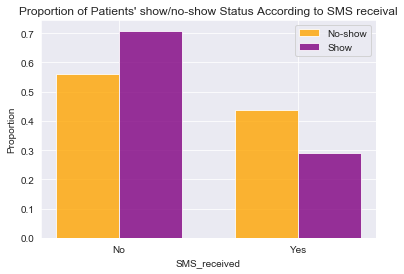

In [881]:
# plot bars 
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')
    
#labels and title
plt.xlabel('SMS_received')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['No','Yes']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to SMS receival")
plt.xticks(locations,labels)
    
#legend
plt.legend();

In [882]:
# percentage of patient who got text reminder

# get the patient counts grouped by sms receival

patient_count_by_sms = df.groupby('SMS_received').count().PatientID
patient_count_by_sms

SMS_received
0    75044
1    35482
Name: PatientID, dtype: int64

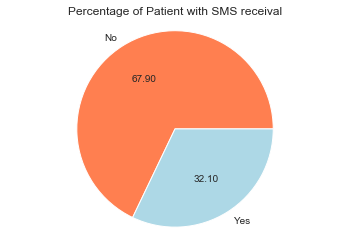

In [883]:
# plot pie chart
plt.pie(patient_count_by_sms,labels=['No','Yes'], colors=['coral','lightblue'],autopct='%.2f')
plt.axis('equal')
plt.title('Percentage of Patient with SMS receival');

### Observations
- Patients who received a text reminder has less percentage(32%) in total patient count.
- Patient who did not receive a text reminder showed up more. So, a text reminder did not really impact on their decision of showing up in this case.

### Question 9: Does scholarship play any part in showing up on scheduled appointment day?

In [884]:
# get distribution of scholarship in no-show up category
scholarship_group_counts = df.groupby(['No-show','SMS_received']).count().PatientID
scholarship_group_counts 

No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: PatientID, dtype: int64

In [885]:
#get proportions by dividing scholarship group counts by total # of No-show(Yes) status counts
no_show_proportions = scholarship_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

SMS_received
0    0.561629
1    0.438371
Name: PatientID, dtype: float64

In [886]:
#get proportions by dividing scholarship group counts by total # of No-show(No) status counts
show_proportions = scholarship_group_counts['No']/show_up_totals['No']
show_proportions

SMS_received
0    0.708663
1    0.291337
Name: PatientID, dtype: float64

### Plot proportions on a bar chart

In [887]:
#location of x axis varaiable
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

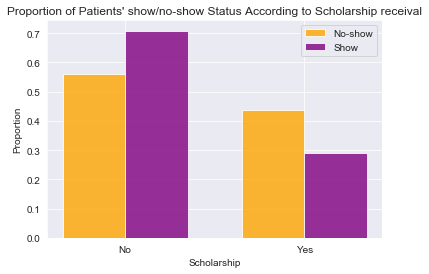

In [888]:
# plot bars 
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')
    
#labels and title
plt.xlabel('Scholarship')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = (['No','Yes']) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Scholarship receival")
plt.xticks(locations,labels)
    
#legend
plt.legend();

In [889]:
# percentage of patient who got enrolled in scolarship program

# get the patient counts grouped by scolarship program

patient_count_by_scholarship = df.groupby('Scholarship').count().PatientID
patient_count_by_scholarship

Scholarship
0    99665
1    10861
Name: PatientID, dtype: int64

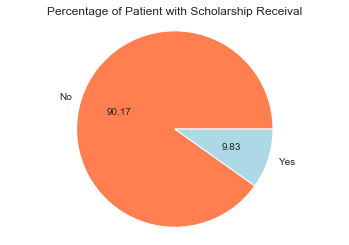

In [890]:
# plot pie chart
plt.pie(patient_count_by_scholarship,labels=['No','Yes'], colors=['coral','lightblue'],autopct='%.2f')
plt.axis('equal')
plt.title('Percentage of Patient with Scholarship Receival');

### Observations:
- Only 10 % patient got scholarship and among them the no-show portion is higher.
- On the other hand 90 % are without scholarship program and the show up rate is higher among them.
- So scholarship negetively  played a role in showing up.

### Question 10: Does gender play any role in any of these health condition?
It would be interesting to see the pattern of health conditions among female and male patients. Let's dig into that. 

In [891]:
# get gender distribution of diabetic patients
diabetes_group_counts = df.groupby(['Gender','Diabetes']).count().PatientID
diabetes_group_counts 

Gender  Diabetes
F       0           66233
        1            5606
M       0           36350
        1            2337
Name: PatientID, dtype: int64

In [892]:
#get proportions by dividing diabetes group counts by total # of female counts
dia_female_proportions = diabetes_group_counts['F']/patient_count_by_gender['F']
dia_female_proportions

Diabetes
0    0.921964
1    0.078036
Name: PatientID, dtype: float64

In [893]:
#get proportions by dividing diabetes group counts by total # of male counts
dia_male_proportions = diabetes_group_counts['M']/patient_count_by_gender['M']
dia_male_proportions

Diabetes
0    0.939592
1    0.060408
Name: PatientID, dtype: float64

In [894]:
# get gender distribution of hypertensive patients
hypertension_group_counts = df.groupby(['Gender','Hypertension']).count().PatientID
hypertension_group_counts

Gender  Hypertension
F       0               56500
        1               15339
M       0               32225
        1                6462
Name: PatientID, dtype: int64

In [895]:
#get proportions by dividing hypertension group counts by total # of female counts
hyp_female_proportions = hypertension_group_counts['F']/patient_count_by_gender['F']
hyp_female_proportions

Hypertension
0    0.786481
1    0.213519
Name: PatientID, dtype: float64

In [896]:
#get proportions by dividing hypertension group counts by total # of male counts
hyp_male_proportions = hypertension_group_counts['M']/patient_count_by_gender['M']
hyp_male_proportions

Hypertension
0    0.832967
1    0.167033
Name: PatientID, dtype: float64

In [897]:
#get gender distribution of alcoholic patients
alcoholism_group_counts = df.groupby(['Gender','Alcoholism']).count().PatientID
alcoholism_group_counts

Gender  Alcoholism
F       0             70616
        1              1223
M       0             36550
        1              2137
Name: PatientID, dtype: int64

In [898]:
#get proportions by dividing alcoholism group counts by total # of female counts
alc_female_proportions = alcoholism_group_counts['F']/patient_count_by_gender['F']
alc_female_proportions

Alcoholism
0    0.982976
1    0.017024
Name: PatientID, dtype: float64

In [899]:
#get proportions by dividing alcoholism group counts by total # of male counts
alc_male_proportions = alcoholism_group_counts['M']/patient_count_by_gender['M']
alc_male_proportions

Alcoholism
0    0.944762
1    0.055238
Name: PatientID, dtype: float64

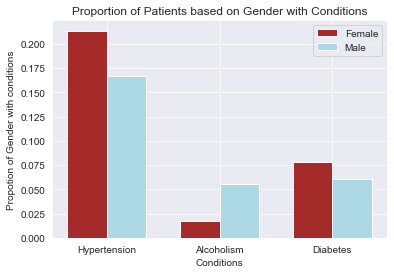

In [900]:
ind = np.array([1,2,3])
width = 0.35
plt.bar(ind, [hyp_female_proportions[1], alc_female_proportions[1],dia_female_proportions[1]], width=width, color='brown', label='Female')
plt.bar(ind+width, [hyp_male_proportions[1], alc_male_proportions[1],dia_male_proportions[1]], width=width, color= 'lightblue', label='Male')

plt.xlabel('Conditions')
plt.ylabel('Propotion of Gender with conditions')

locations = ind + width / 2
plt.xticks(locations, ['Hypertension','Alcoholism','Diabetes'])
plt.title('Proportion of Patients based on Gender with Conditions')

plt.legend();


### Observations
- The above plot shows that hypertension and diabetes are more common in female patients(21% and 7%) .
- Male patients have more alcohol related issue 5% where as only 1.7% female patient falls into alcoholism.

### Question 11 : Which hospital location gets less 'No-show' response?
There are 81 locations in the dataset and it will be effective to find out where the top five and bottom five 'No-show' happened.

In [901]:
# Group by location
location_group = df.groupby(['No-show','Neighbourhood']).count().PatientID
location_group

No-show  Neighbourhood      
No       AEROPORTO                 7
         ANDORINHAS             1741
         ANTÔNIO HONÓRIO         221
         ARIOVALDO FAVALESSA     220
         BARRO VERMELHO          332
                                ... 
Yes      SÃO JOSÉ                428
         SÃO PEDRO               515
         TABUAZEIRO              573
         UNIVERSITÁRIO            32
         VILA RUBIM              141
Name: PatientID, Length: 160, dtype: int64

In [902]:
# Scheduled to Show/No-show Ratio
no_show_proportions = location_group['Yes']/show_up_totals['Yes']
no_show_proportions

Neighbourhood
AEROPORTO              0.000045
ANDORINHAS             0.023343
ANTÔNIO HONÓRIO        0.002240
ARIOVALDO FAVALESSA    0.002778
BARRO VERMELHO         0.004077
                         ...   
SÃO JOSÉ               0.019176
SÃO PEDRO              0.023075
TABUAZEIRO             0.025673
UNIVERSITÁRIO          0.001434
VILA RUBIM             0.006317
Name: PatientID, Length: 80, dtype: float64

In [903]:
high_no_shows = no_show_proportions.sort_values(ascending = False)[:5]
high_no_shows

Neighbourhood
JARDIM CAMBURI    0.065639
MARIA ORTIZ       0.054617
ITARARÉ           0.041355
RESISTÊNCIA       0.040593
CENTRO            0.031498
Name: PatientID, dtype: float64

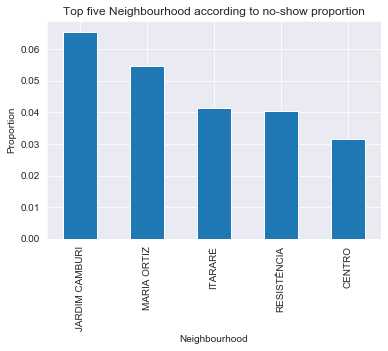

In [904]:
high_no_shows.plot.bar(x ='Neighbourhood');
plt.ylabel('Proportion')
plt.title('Top five Neighbourhood according to no-show proportion');

In [905]:
low_no_shows = no_show_proportions.sort_values(ascending = True)[:5]
low_no_shows

Neighbourhood
AEROPORTO                      0.000045
ILHA DO FRADE                  0.000090
ILHAS OCEÂNICAS DE TRINDADE    0.000090
ILHA DO BOI                    0.000134
PONTAL DE CAMBURI              0.000538
Name: PatientID, dtype: float64

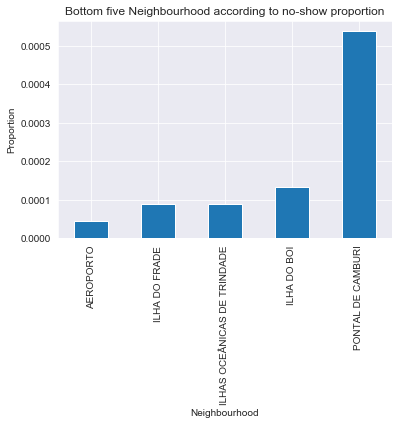

In [906]:
low_no_shows.plot.bar(x='Neighbourhood')
plt.ylabel('Proportion')
plt.title('Bottom five Neighbourhood according to no-show proportion');

In [907]:
idx= no_show_proportions.idxmax()
idx

'JARDIM CAMBURI'

### Observations
- Jardim Camburi is the hospital location where most of the patient did not show up even after making an appoinment compared to total number of appointments made at that location.
- Top five No-show places(where patients did not visit on appointment day) are JARDIM CAMBURI,MARIA ORTIZ,ITARARÉ,RESISTÊNCIA and CENTRO
- Top five show-up places(where patients did visit on appointment day) are AEROPORTO,ILHA DO FRADE,ILHAS OCEÂNICAS DE TRINDADE,ILHA DO BOI and PONTAL DE CAMBURI.

### Question 12:How being handicap does impact on not-showing up on appoinement day?


In [908]:
# get distribution of scholarship in no-show up category
handicap_group_counts = df.groupby(['No-show','Handicap']).count().PatientID
handicap_group_counts 

No-show  Handicap
No       0           86373
         1            1676
         2             146
         3              10
         4               2
Yes      0           21912
         1             366
         2              37
         3               3
         4               1
Name: PatientID, dtype: int64

In [909]:
#get proportions by dividing scholarship group counts by total # of No-show(Yes) status counts
no_show_proportions = handicap_group_counts['Yes']/show_up_totals['Yes']
no_show_proportions

Handicap
0    0.981764
1    0.016399
2    0.001658
3    0.000134
4    0.000045
Name: PatientID, dtype: float64

In [910]:
#get proportions by dividing scholarship group counts by total # of No-show(No) status counts
show_proportions = handicap_group_counts['No']/show_up_totals['No']
show_proportions

Handicap
0    0.979208
1    0.019001
2    0.001655
3    0.000113
4    0.000023
Name: PatientID, dtype: float64

In [911]:
#location of x axis varaiable
ind = np.arange(len(no_show_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

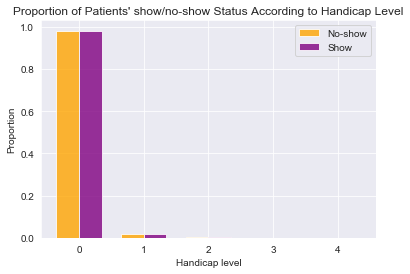

In [912]:
# plot bars 
no_show_bars = plt.bar(ind,no_show_proportions, width, color='orange', alpha=0.8, label = 'No-show')
show_bars = plt.bar(ind + width,show_proportions, width, color='purple', alpha=0.8, label = 'Show')
    
#labels and title
plt.xlabel('Handicap level')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = ([0,1,2,3,4]) # xtick labels
plt.title("Proportion of Patients' show/no-show Status According to Handicap Level")
plt.xticks(locations,labels)
    
#legend
plt.legend();

In [913]:
# get the patient counts grouped by handicap category
patient_count_by_handicap = df.groupby('Handicap').count().PatientID
patient_count_by_handicap

Handicap
0    108285
1      2042
2       183
3        13
4         3
Name: PatientID, dtype: int64

### Observations
- Only 0 and 1 category handicap patients have the lion share on show -no show proportions. From the chart above it is evident that show-no_show have similar portion in both categories. 2,3,4 categories are almost negligible and do not bring any insight. The dataset does not provide any specific information about those category as well. So it is hard to make any clear conclusion.

## Conclusions


After analyzing 9 variables with regard to No-show response, the following findings are worth to highlight. The findings are tentative and based on what dataset we have.

-  Number of patients who did not show up are mostly within first two age groups i.e from age of  0 to 39 .  Patients above age of 40 are more likely to show up at appoinment day.
- Number of female patients are higher than male patients. 65% to 35%. No significant difference in proportion is visible between female and male patients who did/did NOT show up. So there is no clear impact of gender in case of not visiting on appointment day even after scheduling for that.
- Only 7 % of all patients  have diabetes. Most of the patients who do not have diabetes, have higher record of attending the hospital on thier appointment day. Although the difference is small, but diabetic patient seems less caring in regard to hospital visit.
- 80 % of total patient do not have hypertension and they are less likely to show up on appointment day.
- Only 3% patients have alcohol addiction problem.Among two groups the ratio of show and no-show trend is similar.
- Patients who received a text reminder has less percentage(32%) in total patient count.Patients who did not receive a text reminder showed up more. So, a text reminder did not really impact on their decision of showing up in this case.
- Only 10 % patient got enrolled in scholarship and among them the no-show portion is higher.
- Only 0 and 1 category handicap patients have the lion share on show -no show proportions.
- Hypertension and diabetes are more common in female patients(21% and 7%) .
- Male patients have more alcohol related issue 5% where as only 1.7% female patient falls into alcoholism.
- Jardim Camburi is the hospital location where most of the patient did not show up even after making an appoinment compared to total number of appointments made at that location.
- Top five No-show places(where patients did not visit on appointment day) are JARDIM CAMBURI,MARIA ORTIZ,ITARARÉ,RESISTÊNCIA and CENTRO.
- Top five show-up places(where patients did visit on appointment day) are AEROPORTO,ILHA DO FRADE,ILHAS OCEÂNICAS DE TRINDADE,ILHA DO BOI and PONTAL DE CAMBURI.


## Limitations
- Since the data are collected from several neighbourhood, there might be other important factors missing from what we have used here to analyse. This could contribute to misleading or skewed results or deviate us from figuring out real reasons behind patient's particular response on appointment day. 
- Majority of patients are female and this could drive our analysis toward wrong descriptive statistics. To offset the possible error, I turned the number in proportion. This is also true for other variables those we studied here.

## Disclaimer
The above analysis does not augur to provide any definitive or conclusive inferences in regard to patient's action or response or any reason behind those behavior. This project study remains  within the boundary of descriptive statistics.Any predictive response is not expected through this analysis.

## References
- https://pandas.pydata.org/
- https://numpy.org/
- https://matplotlib.org
-https://classroom.udacity.com/nanodegrees/nd002/parts/6f1ba175-1429-48e9-ab26-44d08ab21e7e/modules/77a69f88-993e-4b5e-8576-a135209e29bf/lessons/31a04b0e-aac8-4099-99cb-6d8b9391ea0b/concepts/b969ed37-3f0f-43ad-8301-3526d19e45fd